# Using logistic regression on Predicting In-Hospital Deaths in the ICU

In [105]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 

from sklearn.model_selection import train_test_split

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Configure visualisations
%matplotlib inline

####  PhysioNet Computing in Cardiology Challenge 2012 dataset: https://physionet.org/content/challenge-2012/1.0.0/sources/#files-panel

**<h2> Exploratory Data Analysis**

In [106]:
features =  pd.read_csv('ICU_train.csv', delimiter=',')
labels =  pd.read_csv('ICU_labels.csv', delimiter=',')

In [107]:
features.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [108]:
features.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [109]:
features.shape

(3999, 42)

In [110]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [111]:
features.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [112]:
# count NaN values in each column
print(features.isnull().sum())

ALP            0
ALT            0
AST            0
Age            0
Albumin        0
BUN            0
Bilirubin      0
Cholesterol    0
Creatinine     0
DiasABP        0
FiO2           0
GCS            0
Gender         0
Glucose        0
HCO3           0
HCT            0
HR             0
Height         0
ICUType        0
K              0
Lactate        0
MAP            0
MechVent       0
Mg             0
NIDiasABP      0
NIMAP          0
NISysABP       0
Na             0
PaCO2          0
PaO2           0
Platelets      0
RecordID       0
RespRate       0
SaO2           0
SysABP         0
Temp           0
TroponinI      0
TroponinT      0
Urine          0
WBC            0
Weight         0
pH             0
dtype: int64


In [113]:
labels.shape

(3999, 1)

In [114]:
labels.sample(n=10)   # In-hospital death (0: survivor, or 1: died in-hospital)

,In-hospital_death
634,0
3050,0
3730,0
2559,0
3581,0
1529,0
798,0
1457,0
3354,0
3248,1


In [115]:
labels["In-hospital_death"].value_counts()

In-hospital_death
0    3445
1     554
Name: count, dtype: int64

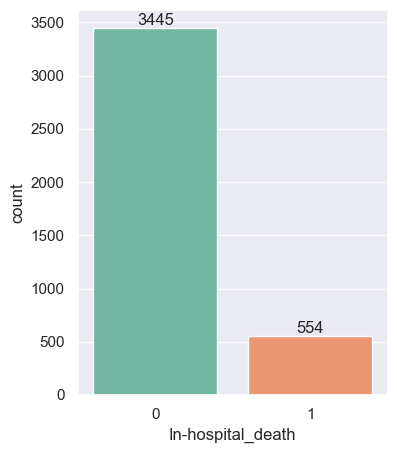

In [116]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(4, 5))
ax= sns.countplot(labels, x="In-hospital_death", palette = "Set2")
# Show the plot
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Over-sampling using SMOTE

In [117]:
from imblearn.over_sampling import SMOTE   # Synthetic Minority Oversampling Technique
oversample = SMOTE(random_state=123)

X = features
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
columns = X_train.columns

os_data_X, os_data_y = oversample.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['In-hospital_death'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of survivor(0) in oversampled data",len(os_data_y[os_data_y['In-hospital_death']==0]))
print("Number of died in-hospital(1)",len(os_data_y[os_data_y['In-hospital_death']==1]))
print("Proportion of survivor data in oversampled data is ",len(os_data_y[os_data_y['In-hospital_death']==0])/len(os_data_X))
print("Proportion of died in-hospital data in oversampled data is ",len(os_data_y[os_data_y['In-hospital_death']==1])/len(os_data_X))

length of oversampled data is  4764
Number of survivor(0) in oversampled data 2382
Number of died in-hospital(1) 2382
Proportion of survivor data in oversampled data is  0.5
Proportion of died in-hospital data in oversampled data is  0.5


In [118]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(os_data_X))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))

### Recursive Feature Elimination

In [119]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_final_vars=features.columns.values.tolist()

logreg = LogisticRegression()
rfe = RFE(logreg,  n_features_to_select= None)
rfe = rfe.fit(X_train_scaled, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True  True False  True  True False  True
 False  True False False  True False  True  True  True False False False
  True  True  True  True False  True False False False False False  True
 False False  True False  True  True]
[17  8  7  1  1  1  1 15  1  1  9  1  2  1 21 10  1 13  1  1  1 18 22  6
  1  1  1  1  5  1 19 12  3 11 20  1  4 14  1 16  1  1]


In [120]:
X_train.columns[rfe.support_]

Index(['Age', 'Albumin', 'BUN', 'Bilirubin', 'Creatinine', 'DiasABP', 'GCS',
       'Glucose', 'HR', 'ICUType', 'K', 'Lactate', 'NIDiasABP', 'NIMAP',
       'NISysABP', 'Na', 'PaO2', 'Temp', 'Urine', 'Weight', 'pH'],
      dtype='object')

[Text(0, 0.5, 'Age'),
 Text(0, 1.5, 'Albumin'),
 Text(0, 2.5, 'BUN'),
 Text(0, 3.5, 'Bilirubin'),
 Text(0, 4.5, 'Creatinine'),
 Text(0, 5.5, 'DiasABP'),
 Text(0, 6.5, 'GCS'),
 Text(0, 7.5, 'Glucose'),
 Text(0, 8.5, 'HR'),
 Text(0, 9.5, 'ICUType'),
 Text(0, 10.5, 'K'),
 Text(0, 11.5, 'Lactate'),
 Text(0, 12.5, 'NIDiasABP'),
 Text(0, 13.5, 'NIMAP'),
 Text(0, 14.5, 'NISysABP'),
 Text(0, 15.5, 'Na'),
 Text(0, 16.5, 'PaO2'),
 Text(0, 17.5, 'Temp'),
 Text(0, 18.5, 'Urine'),
 Text(0, 19.5, 'Weight'),
 Text(0, 20.5, 'pH')]

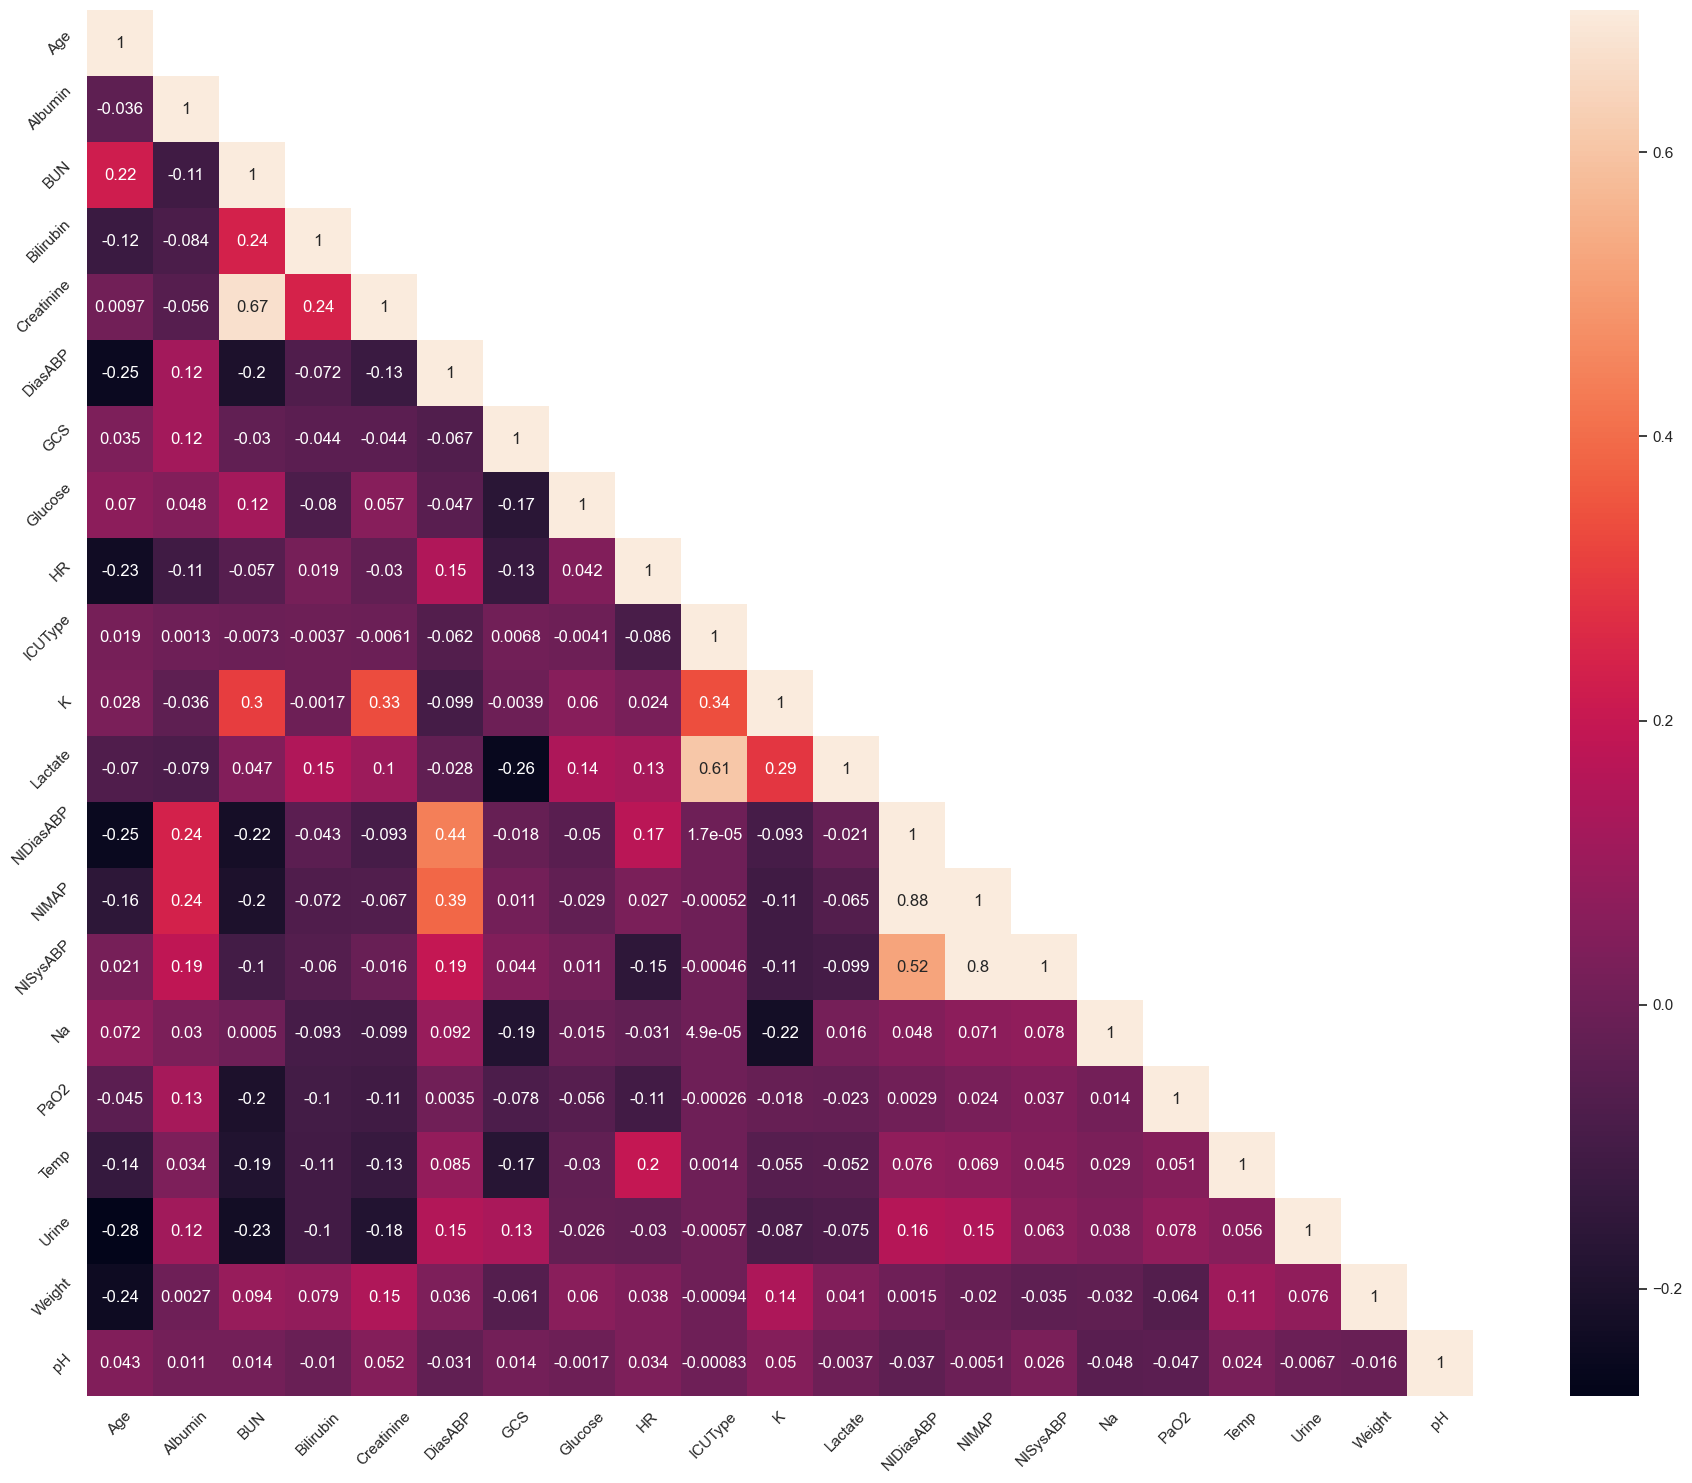

In [121]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train_scaled[X_train_scaled.columns[rfe.support_]].corr()

obj = np.array(corr)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots(figsize=(25, 18))

sns.heatmap(corr, mask=obj,vmax=.7, square=True,annot=True, ax=ax)
ax.set_xticklabels(X_train.columns[rfe.support_].tolist(), rotation=45) 
ax.set_yticklabels(X_train.columns[rfe.support_].tolist(), rotation=45) 

In [122]:
#Model Building (Logistic Regression)

classifier = LogisticRegression(random_state=0, penalty='l1',solver='liblinear')  # Logistic Regression (Lasso)
classifier.fit(X_train_scaled[X_train_scaled.columns[rfe.support_]], os_data_y)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [123]:
# Predicting Test Set
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix ,classification_report

y_pred = classifier.predict(X_test_scaled[X_train_scaled.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression RFE (Lasso),0.735,0.253406,0.678832,0.369048


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1063
           1       0.25      0.68      0.37       137

    accuracy                           0.73      1200
   macro avg       0.60      0.71      0.60      1200
weighted avg       0.87      0.73      0.78      1200



Test Data Accuracy: 0.7350


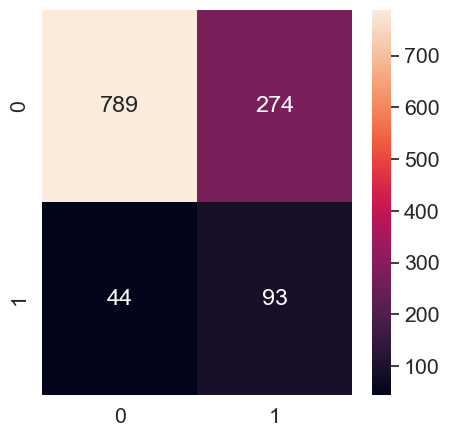

In [125]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

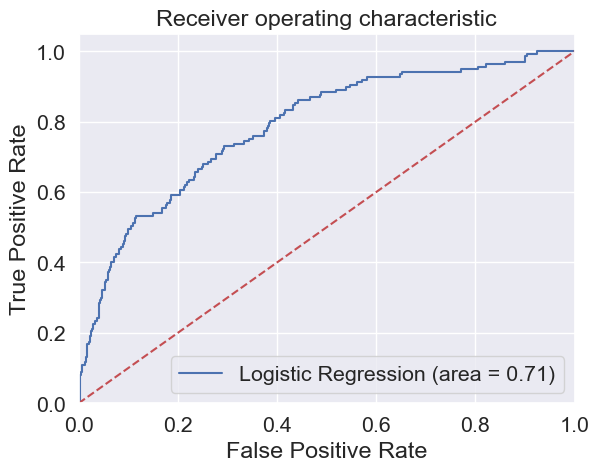

In [126]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test_scaled[X_train_scaled.columns[rfe.support_]])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### Accuracy Paradox
    Accuracy is not the best way to measure a perfomance of model. It´s because Accuracy Paradox. 
    More about Accuracy Paradox http://towardsdatascience.com/accuracy-paradox-897a69e2dd9b

### Cumulative Accuracy Profile (CAP)

In [127]:
# code from https://www.kaggle.com/code/vinicius150987/logistic-regression-rfe?scriptVersionId=11743609&cellId=38

#Plotting Cumulative Accuracy Profile (CAP)

from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()

      0         1
0   0.0  0.999159
1   1.0  0.996378
2   0.0  0.994975
3   1.0  0.993528
4   1.0  0.993497
5   0.0  0.987959
6   1.0  0.985338
7   1.0  0.977578
8   1.0  0.965268
9   1.0  0.962341
10  1.0  0.961678
11  1.0  0.961599
12  1.0  0.960659
13  1.0  0.959910
14  0.0  0.958528
15  0.0  0.958225
16  1.0  0.957316
17  0.0  0.954787
18  0.0  0.950980
19  0.0  0.946148


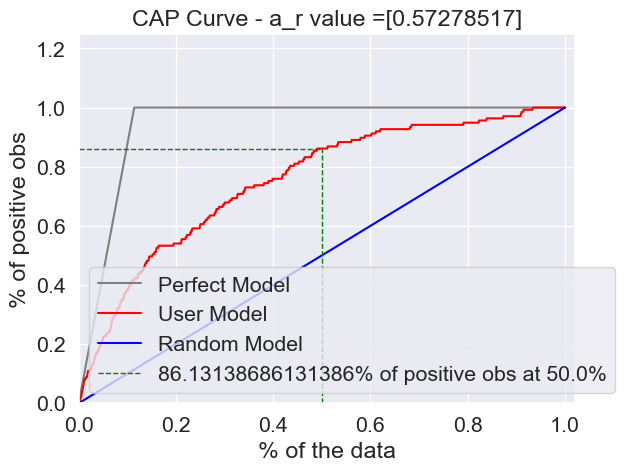

In [128]:
y_pred_prob = classifier.predict_proba(X_test_scaled[X_train_scaled.columns[rfe.support_]])
capcurve(y_test,y_pred_prob[:,1])

### Reference
    
    https://physionet.org/content/challenge-2012/1.0.0/
    https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
    https://www.blog.trainindata.com/recursive-feature-elimination-with-python/
    https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69
